<h1><center>A Tutorial for the Bell Energy Balance Model (Bell_EMB)</center></h1>

## Author: Taylor James Bell
#### Last Modified: 2018-11-02

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const

import Bell_EBM as ebm

<center>
    <h1>First, let's setup a planet, star, and system</h1>
    <h3>We'll use the WASP-12b system and include the effects of H<sub>2</sub> dissociation (Bell & Cowan 2018)</h3>
</center>

In [2]:
# WASP-12b
# Radius and mass are in Jupiter units
# Orbital Period is in units of days
# Semi-major axis is in AU
# Wind speed is in m/s
# All angles are in degrees
planet = ebm.Planet('bell2018', Porb=1.09142030, a=0.02340, rad=1.900, mass=1.470, vWind=5e3, inc=83.37)

# WASP-12
# Radius and mass are in solar units
# Temperatures are always in K
star = ebm.Star(teff=6300, rad=1.59, mass=1.20)

# Load the star and planet into a system
system = ebm.System(star, planet)

## Let's show the star-planet system

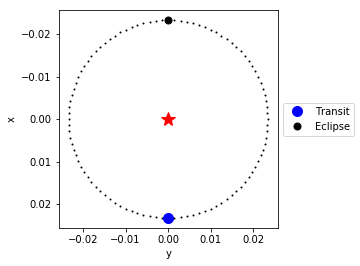

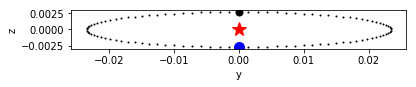

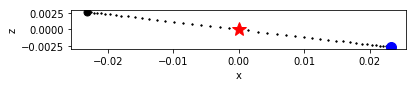

In [3]:
planet.orbit.show_orbit()

## Now, let's model the planet's atmoshere

In [4]:
# Run initial burn-in - try guessing the median irradiation temperature to begin with
FincMed = np.median(system.Finc(np.linspace(0,system.planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)
T0 = (FincMed/const.sigma_sb.value)**0.25
t0 = 0
t1 = system.planet.Porb*20
dt = system.planet.Porb/10
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

# Run a higher time resolution burn-in to clean up any remaining mess
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb*20
dt = system.planet.Porb/100
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

## Then we can visualize the planet's temperature and H<sub>2</sub> dissociation map
#### Even with only moderate winds, there is a strong hotspot offset due to the effects of H<sub>2</sub> dissociation/recombination

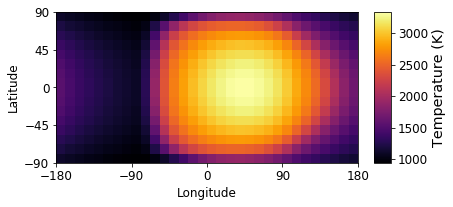

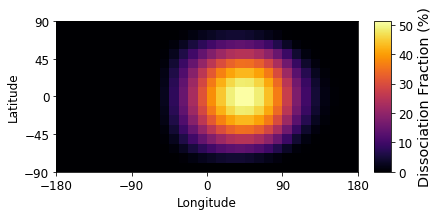

In [5]:
fig = system.planet.showMap()
plt.show()

fig = system.planet.showDissociation()
plt.show()

## Finally, we can look at the orbital phase curve

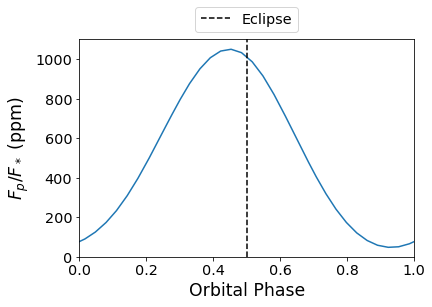

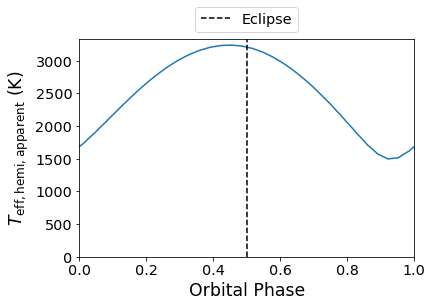

In [6]:
# Plot the lightcurves - by default it will use one planetary orbit
fig = system.plot_lightcurve()
plt.show()

# Plot the temperature curves
fig = system.plot_tempcurve()
plt.show()

<br/><br/><br/><br/><br/>
<h1><center>Now let's look at an eccentric rocky planet</center></h1>

In [7]:
# We can specify a rotation rate for the planet - we'll say it somehow isn't tidally locked yet
# We also don't have to specify the planet's orbital period - it will be calculated using Kepler's equations
planet = ebm.Planet('rock', Prot=1, a=0.05, e=0.4, argp=45, rad=const.R_earth.value/const.R_jup.value,
                    mass=const.M_earth.value/const.M_jup.value)

# The default values are the sun's values already
star = ebm.Star()

# Load everything into the system - this is when the orbital period is calculated if not provided
system = ebm.System(star, planet)

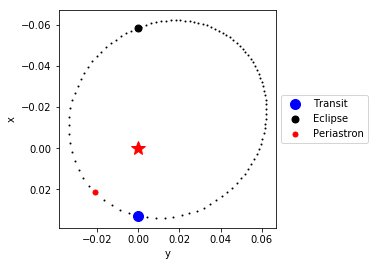

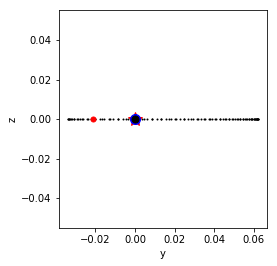

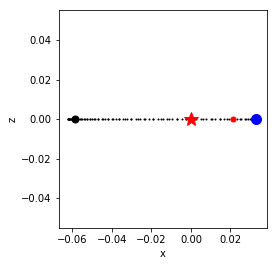

In [8]:
# The plotted dots have equal spacing in time, so the get scruntched up near apastron
planet.orbit.show_orbit()

In [9]:
# Run initial burn-in - try guessing the median irradiation temperature to begin with
FincMed = np.median(system.Finc(np.linspace(0,system.planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)
T0 = (FincMed/const.sigma_sb.value)**0.25
t0 = 0
t1 = system.planet.Porb*20
dt = system.planet.Porb/10
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

# Run a higher time resolution burn-in to clean up any remaining mess
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb*20
dt = system.planet.Porb/100
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

### Because this is an eccentric planet and it isn't synchronously rotating, it's map isn't constant with time. <br/> As a result, we need to grab the map and time stamps for one orbit to do our plotting

In [10]:
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb
dt = system.planet.Porb/1000
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

## Let's show the map during periastron
#### For planet's which are not synchronously rotating, the longitude of zero in all plots refers to the sub-stellar point. This requires that we pass in the time of the map though, so it can rotate it as necessary

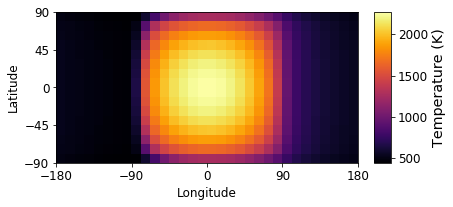

In [11]:
phases = system.get_phase(times)
phasePeri = system.get_phase_periastron()
indexPeri = np.argmin(np.abs(phases-phasePeri))

fig = system.planet.showMap(maps[indexPeri], times[indexPeri])
plt.show()

## This time, let's look at the lightcurve at the Spitzer/IRAC 4.5 micron band

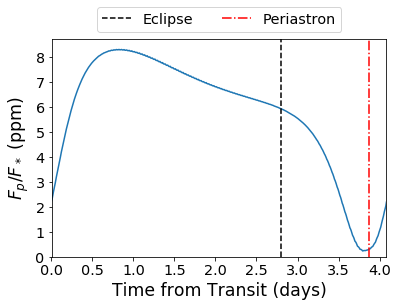

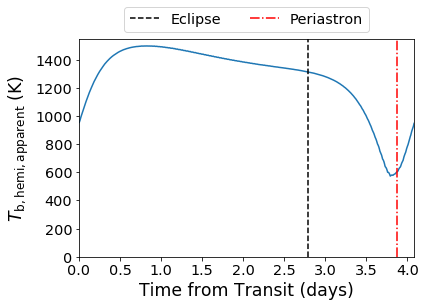

In [12]:
# Plot the lightcurves
fig = system.plot_lightcurve(times, maps, bolo=False, wav=4.5e-6)
plt.show()

# Plot the temperature curves
fig = system.plot_tempcurve(times, maps, bolo=False, wav=4.5e-6)
plt.show()

### It might seem odd that the coldest temperature on the plot above is near periastron when the planet is receiving the most flux, but this is because we are looking at the planet's cold nightside at that point in time

<br/><br/><br/><br/>
<center>
    <h1>Have fun, explore, learn!</h1>
    <br/><br/><br/><br/>
    <h3>The full API can be found at <a href=https://bell-ebm.readthedocs.io>https://bell-ebm.readthedocs.io</a></h3>
    <h3>The most up-to-date version of the package can be found at <a href=https://github.com/taylorbell57/Bell_EBM>https://github.com/taylorbell57/Bell_EBM</a></h3>
    <h4>Taylor Bell may be contacted (taylor DOT bell AT mail DOT mcgill DOT ca) to report any issues discovered with the code</h4>
</center>